<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg3/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Andhika Aria Pratama Nugraha
#1103202121
#Tugas ke mgg3
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

In [39]:
# Impor library scikit-learn
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()

# Mengekstrak data fitur dan target
X = iris.data  # Data fitur
y = iris.target  # Label atau target

# Menampilkan beberapa sampel data pertama
print("Contoh data Iris pertama:")
print(X[:5])  # Tampilkan 5 baris pertama dari data fitur
print("Label:")
print(y[:5])  # Tampilkan 5 label pertama


Contoh data Iris pertama:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Label:
[0 0 0 0 0]


In [40]:
# Impor library yang diperlukan
import pandas as pd
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()

# Membuat DataFrame dari data Iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Menambahkan kolom "target" ke DataFrame
iris_df['target'] = iris.target

# Menampilkan beberapa baris pertama dari DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [41]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [42]:
# Menampilkan nilai unik pada kolom "target"
unique_targets = iris_df['target'].unique()
print(unique_targets)

[0 1 2]


In [43]:
# Kolom atribut (fitur)
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Kolom target
y = iris_df['target']

In [44]:
# Membagi data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Membuat model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

In [46]:
# Melatih model pada data latih
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Memprediksi data uji
y_pred = decision_tree.predict(X_test)

In [48]:
# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree: {accuracy * 100 : .2f}%")

Akurasi model Decision Tree:  100.00%


In [51]:
# Menghasilkan file DOT yang berisi struktur pohon keputusan
dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           filled=True, rounded=True, special_characters=True)


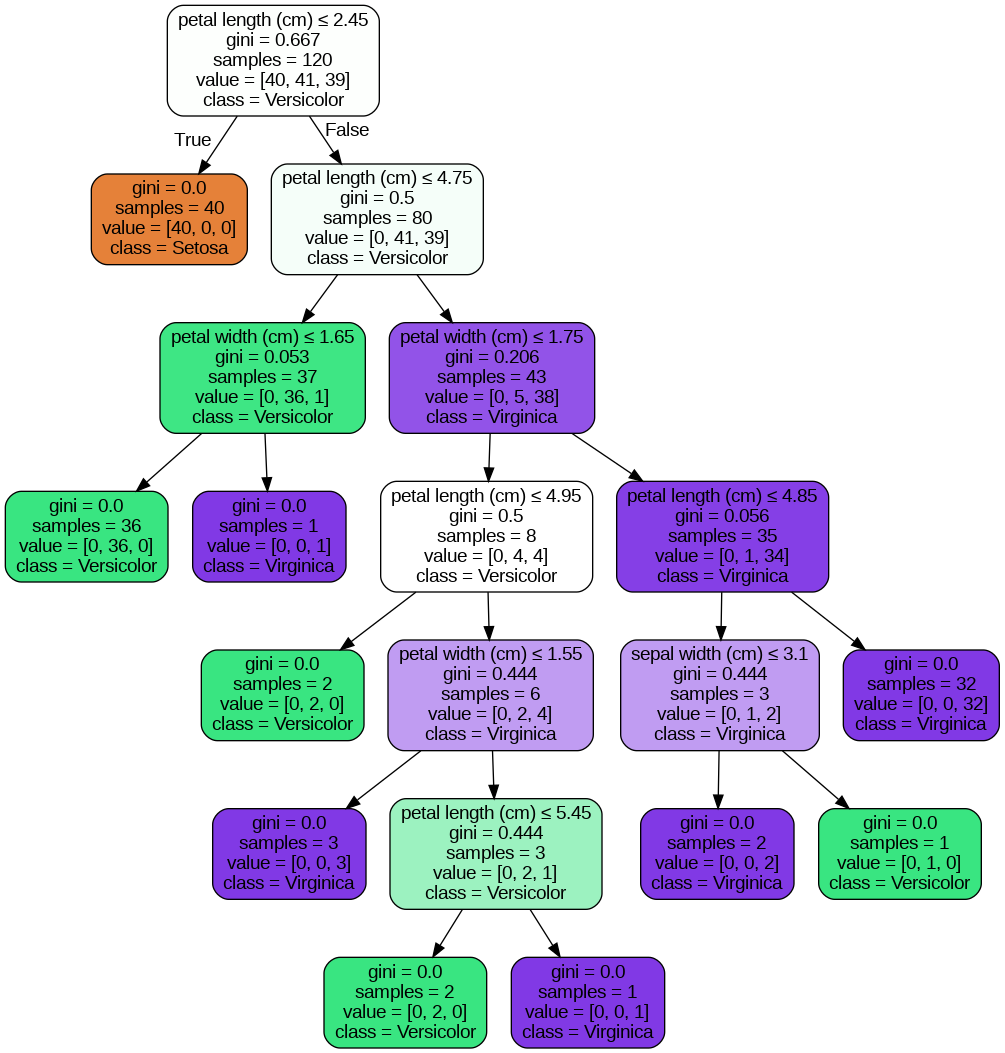

In [52]:
# Membuat grafik dari file DOT
graph = graphviz.Source(dot_data)

#menyimpan file pdf
graph.render("iris_decision_tree")

# Menampilkan grafik di dalam notebook
Image(graph.render(filename='iris_decision_tree', format='png'))


In [55]:
# Inisialisasi tabel untuk menyimpan hasil pemisahan data
results = []

# Lakukan pemisahan data beberapa kali dengan random_state dan tanpa random_state
for i in range(5):
    # Pemisahan data tanpa random_state
    X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
                                                        iris_df['target'],
                                                        test_size=0.2)

    # Menghitung jumlah sampel pada data latih dan data uji
    train_size = len(X_train)
    test_size = len(X_test)

    results.append(["Tanpa Random State", i+1, train_size, test_size])

    # Pemisahan data dengan random_state
    X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
                                                        iris_df['target'],
                                                        test_size=0.2, random_state=42)

    # Menghitung jumlah sampel pada data latih dan data uji
    train_size = len(X_train)
    test_size = len(X_test)

    results.append(["Dengan Random State", i+1, train_size, test_size])

# Membuat DataFrame hasil pemisahan data
results_df = pd.DataFrame(results, columns=["Metode", "Percobaan", "Jumlah Data Latih", "Jumlah Data Uji"])

# Menampilkan tabel hasil pemisahan data
print(results_df)

                Metode  Percobaan  Jumlah Data Latih  Jumlah Data Uji
0   Tanpa Random State          1                120               30
1  Dengan Random State          1                120               30
2   Tanpa Random State          2                120               30
3  Dengan Random State          2                120               30
4   Tanpa Random State          3                120               30
5  Dengan Random State          3                120               30
6   Tanpa Random State          4                120               30
7  Dengan Random State          4                120               30
8   Tanpa Random State          5                120               30
9  Dengan Random State          5                120               30


In [56]:
X_data = range(10)
y_data = range(10)

# Ketika random_state ditentukan
print("random_state ditentukan")
for i in range(3):
    # Membagi data menjadi data latih dan data uji dengan random state = 42
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    # Menampilkan data uji (y_test)
    print(y_test)

# Ketika random_state tidak ditentukan
print("random_state tidak ditentukan")
for i in range(3):
# Membagi data menjadi data latih dan data uji tanpa random state
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
# Menampilkan data uji (y_test)
    print(y_test)


random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[9, 6, 2]
[5, 2, 3]
[8, 6, 0]
